In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# This activity is broken down into four parts:

    Part 1: Prepare the Data.

    Part 2: Apply Dimensionality Reduction.

    Part 3: Perform a Cluster Analysis with K-means.

    Part 4: Make a Recommendation.


# Part 1: Prepare the Data

In [2]:
# load the file
myopia_df = pd.read_csv('Resources/Myopia.csv')
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [5]:
# Remove the "MYOPIC" column from the dataset.
clean_myopia_df = myopia_df.drop('MYOPIC', axis=1)

# Save the cleaned data file
clean_myopia_df.to_csv('Resources/cleaned_myopia.csv', index=False)

In [6]:
# Standardize your dataset so that columns that contain larger values do not influence 
# the outcome more than columns with smaller values:

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
df_scaled = scaler.fit_transform(clean_myopia_df)

df_scaled[0:3]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ],
       [-0.42021911,  0.60438629, -0.00997682, -0.5066285 , -0.17781207,
         0.21580879,  0.25709181, -0.91206246, -0.03443904, -0.67299591,
         0.18405806, -0.75023378, -1.01302987, -0.99676897]])

# Part 2: Apply Dimensionality Reduction

In [7]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
 #  For this assignment, preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.9)

# Get the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(df_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [8]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

#Initialize the t-SNE model
tsne = TSNE(learning_rate=250)

#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

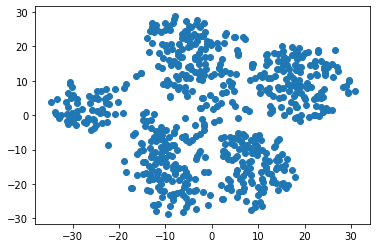

In [9]:
# 2.3 Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0],tsne_features[:,1])

# Part 3: Perform a Cluster Analysis with K-means

In [10]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

    
# If possible, determine where the elbow of the plot is, and at which value of k it appears.

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


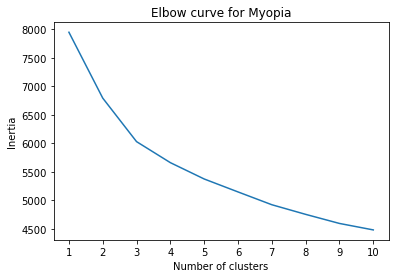

In [11]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

# Part 4: Make a Recommendation

- Based on the finidings above, strudy subjects can be clustered. The optimal number of clusters looks to be 3 based on the elbow curve to 5 based on the t-SNE
- There are some visible patterns after performing the K-Means clustering but the dataset might be too small for further scaling and training of data.
